In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def display(image, cmap=None):
    fig = plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap=cmap)

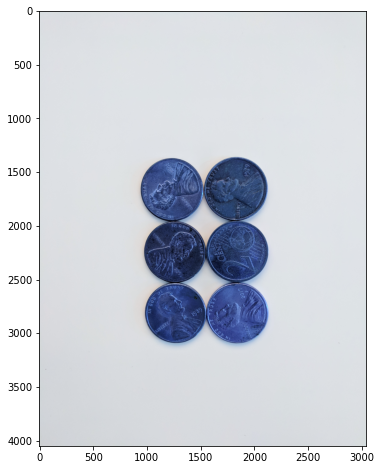

In [5]:
pennies = cv2.imread('pennies.jpg')
display(pennies)

# Default Contouring

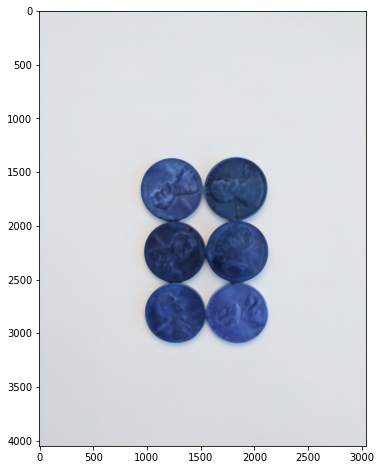

In [6]:
blurred_img = cv2.medianBlur(pennies, 25)
display(blurred_img)

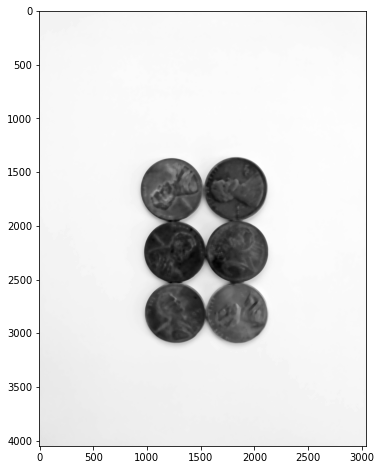

In [10]:
gray_img = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2GRAY)
display(gray_img, 'gray')

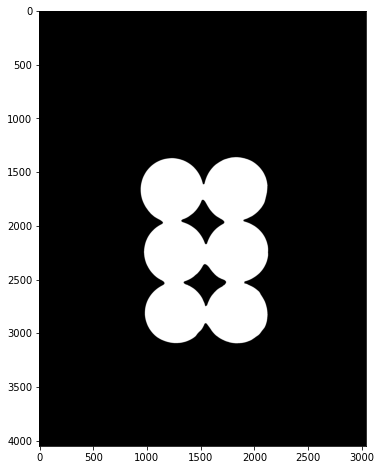

In [11]:
success, thresh_img = cv2.threshold(gray_img, 160, 255, cv2.THRESH_BINARY_INV)
display(thresh_img, 'gray')